In [1]:
%pylab inline
from ray_tracing import *
from density_profile import *
from astropy import units 
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
def reading_data(data):
    halos = np.loadtxt(data)
    h = 0.7
    ids = halos[:,0]
    x = halos[:,1]/h
    y = halos[:,2]/h
    z = halos[:,3]/h
    M = halos[:,4]/h
    R = halos[:,5]/h
    return ids, x, y, z, M, R


In [4]:
ids, x, y, z, M, R = reading_data('Periodic_Illustris3.txt')

In [5]:
ids_emit, x_emit, y_emit, z_emit, D3_mean, M_emit = host_halos(M, x, y, z, ids)


In [7]:
print D3_mean

937.081725676


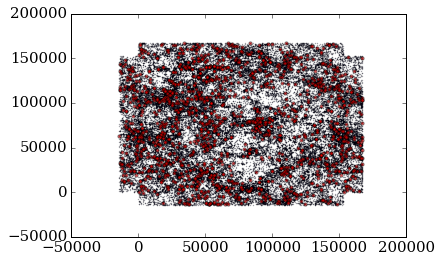

In [8]:
scatter(x, y, alpha=0.5, s=0.1)
scatter(x_emit, y_emit, alpha=0.5, s=10, c='r')

In [9]:
print "Number of emitters", len(M_emit)
print "NUmber of halos", len(M)

Number of emitters 1672
NUmber of halos 69702


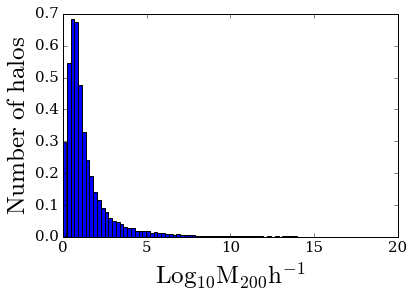

In [10]:
h0 = hist(M, bins=500, normed=True)
xlim(0, 20)
xlabel('$\mathrm{Log_{10}M_{200} h^{-1}}$', fontsize=25)
ylabel('$\mathrm{Number\ of\ halos}$', fontsize=25)

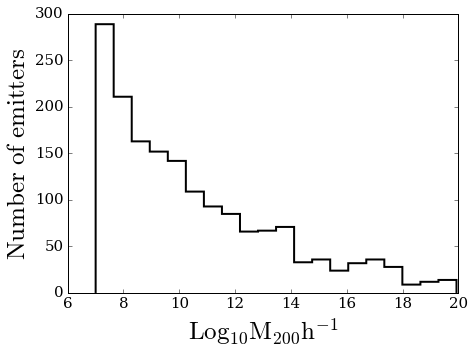

In [238]:
figure(figsize=(7, 5))
h = hist(M_emit, bins=20, color='k', lw=2, histtype='step')
#h0 = hist(M, bins=50,  histtype='step')
#yscale('log')
ylim(0, 300)
xlabel('$\mathrm{Log_{10}M_{200} h^{-1}}$', fontsize=25)
ylabel('$\mathrm{Number\ of\ emitters}$', fontsize=25)
savefig('../../figures/emitters_hist.png', bbox_inches='tight')

In [30]:
d3 = np.zeros(len(M_emit))
for i in range(len(M_emit)):
    d3[i] = environment(x_emit[i], y_emit[i], z_emit[i], x, y, z, D3_mean)

In [60]:
min(d3)

-0.99869097395080597

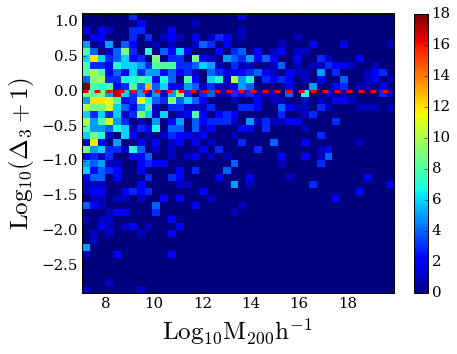

In [59]:
figure(figsize=(7, 5))
h2 = hist2d(M_emit, log10(d3+1), bins=40)
xlabel('$\mathrm{Log_{10}M_{200} h^{-1}}$', fontsize=25)
ylabel('$\mathrm{Log_{10}(\Delta_3+1)}$', fontsize=25)
axhline(0.0, c='r', lw=3.0, ls='--')
#axhline(mean(log10(d3+1)), c='r', lw=2.0)
colorbar()
#yscale('log')
savefig('../../figures/Mass-Delta3.png', bbox_inches='tight')

In [215]:
# Lets compute the hydrogen column density for one halo.

emitter1 = np.where((M_emit<8) & (d3<-0.5))[0]

M1= M_emit[emitter1[0]]
d3_1 = d3[emitter1[0]]
x1 = x_emit[emitter1[0]]
y1 = y_emit[emitter1[0]]
z1 = z_emit[emitter1[0]]

emitter2 = np.where((M_emit<8) & (d3>0.0))[0]

M2= M_emit[emitter2[2]]
d3_2 = d3[emitter2[2]]
x2 = x_emit[emitter2[2]]
y2 = y_emit[emitter2[2]]
z2 = z_emit[emitter2[2]]

print M1, x1, y1, z1, d3_1
print M2, x2, y2, z2, d3_2

7.67975571429 45290.9717796 20627.2122123 40363.8512429 -0.791737988586
7.98648428571 9020.08629591 123369.587053 48068.5427306 3.16266109679


In [216]:
x_c, y_c, z_c, R_c, M_c, ids_c = selecting_halos(x1, y1, z1, 10000.0, x, y, z, R, M, ids)
x_c2, y_c2, z_c2, R_c2, M_c2, ids_c2 = selecting_halos(x2, y2, z2, 10000.0, x, y, z, R, M, ids)

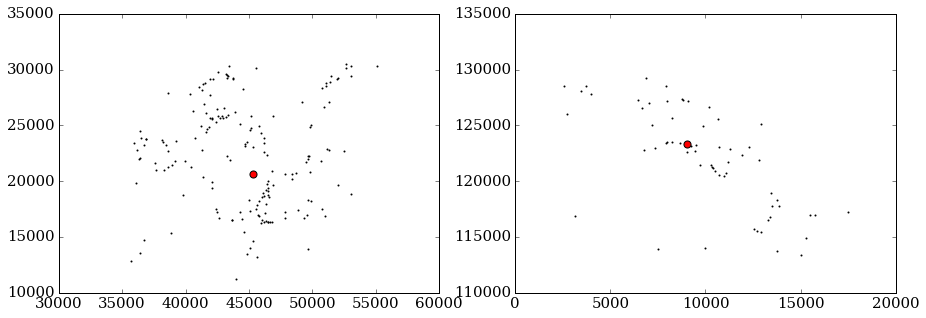

In [219]:
figure(figsize=(15, 5))
subplot(1, 2, 1)
scatter(x_c, y_c, s=1)
scatter(x1, y1, s=50, c='r')

subplot(1, 2, 2)
scatter(x_c2, y_c2, s=1)
scatter(x2, y2, s=50, c='r')

In [179]:
N = 500000

In [180]:
NH_tot = []
for i in range(N):
    x_out, y_out, z_out = random_direction(x1, y1, z1, 10000.0)
    b_abs, x_abs, y_abs, z_abs, R_abs, M_abs, id_abs = impact_parameter(ids_c, x_c, y_c, z_c, 10000.0, x1, y1, z1, R_c, M_c, x_out, y_out, z_out)
    if len(b_abs)>0:
        NH_T = []
        for i in range(len(b_abs)):
            NH_T.append(nh(R_abs[i], b_abs[i], M_abs[i]))
        NH_tot.append(sum(NH_T))


In [221]:
NH_tot2 = []
for i in range(N):
    x_out2, y_out2, z_out2 = random_direction(x2, y2, z2, 10000.0)
    b_abs2, x_abs2, y_abs2, z_abs2, R_abs2, M_abs2, id_abs2 = impact_parameter(ids_c2, x_c2, y_c2, z_c2, 10000.0, x2, y2, z2, R_c2, M_c2, 
                       x_out2, y_out2, z_out2)
    if len(b_abs2)>0:
        NH_T2 = []
        for i in range(len(b_abs2)):
            NH_T2.append(nh(R_abs2[i], b_abs2[i], M_abs2[i]))
        NH_tot2.append(sum(NH_T2))

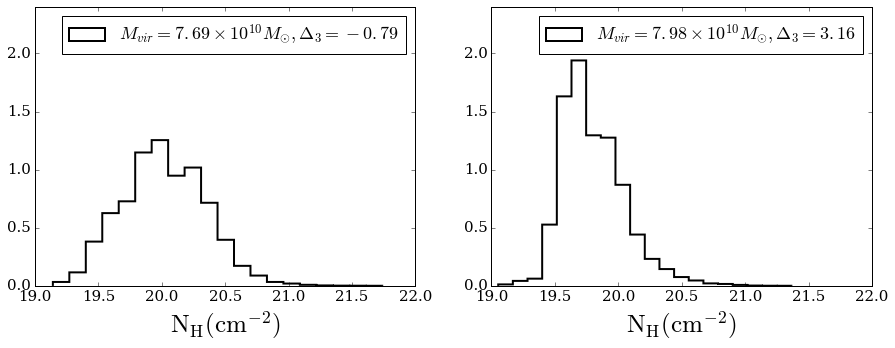

In [234]:
figure(figsize=(15, 5))
subplot(1, 2, 1)
h4 = hist(log10(NH_tot), bins=20, histtype='step', normed=True, lw=2, color='k', 
          label=r'$M_{vir}=7.69 \times 10^{10}M_{\odot}, \Delta_3 = -0.79$')
xlabel('$\mathrm{N_H(cm^{-2})}$', fontsize=25)
legend()
ylim(0, 2.4)
xlim(19, 22)

subplot(1, 2, 2)
h4 = hist(log10(NH_tot2), bins=20, histtype='step', normed=True, lw=2, color='k', 
          label=r'$M_{vir}=7.98 \times 10^{10}M_{\odot}, \Delta_3 = 3.16$')
xlabel('$\mathrm{N_H(cm^{-2})}$', fontsize=25)
legend()
xlim(19, 22)
ylim(0, 2.4)

savefig('../../figures/NHvsMvsD3.png')

In [36]:
H_0 = 3.2407789E-18  / units.s * 0.7
H_0 = H_0.to(units.km / units.s / units.Mpc)
Omega0 = 0.27

def concentration(M):
    c = 9.6*(M/1E12)**(-0.075)
    return c

def H(z):
    Lambda0 = 1. - Omega0
    return H_0*(Omega0*(1+z)**3 - (Omega0+Lambda0-1)*(1+z)**2 + Lambda0)**0.5

def Omega_z(z):
    return Omega0 * (1+z)**3 * (H_0/H(z))**2

def Dvir(z):# from the solution of the top hat model! 
    Omegaz = Omega_z(z)
    x = Omegaz - 1
    Deltavir =  ((18*np.pi**2) +  (82*x) - 39*x**2) / Omegaz
    return Deltavir

def rvir(Mvir):
    z = 6.0
    h = 0.704
    rv = 206/h * (Dvir(z) * Omega0 / 97.2)**(-1.0/3.0) * (Mvir*h/(1E12))**(1.0/3.0)
    rv = rv * units.kpc
    return rv

In [68]:
cc1 = concentration(1E12)
Rvir1 = rvir(1E11)
print cc1, Rvir1
NH = nh(251, 10, cc)

9.6 152.680782958 kpc


In [61]:
Mass = logspace(10, 11, 100)
b = linspace(0, 300, 100)
NH_all = np.zeros(100)
NH_one = np.zeros(100)

In [62]:
for i in range(len(Mass)):
    cc_all = concentration(Mass[i])
    Rvir = rvir(Mass[i])
    NH_all[i] = nh(Rvir.value, 10.0, cc_all)
    NH_one[i] = nh(Rvir1.value, b[i], cc1 )

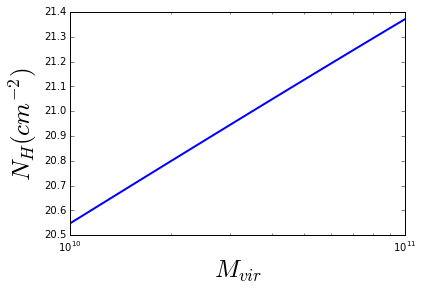

In [63]:
plot(Mass, log10(NH_all), lw=2)
xscale('log')
xlabel('$M_{vir}$', fontsize=25)
ylabel('$N_H (cm^{-2})$', fontsize=25)

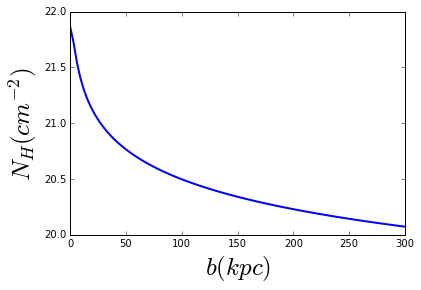

In [66]:
plot(b, log10(NH_one), lw=2)
xlabel('$b(kpc)$', fontsize=25)
ylabel('$N_H (cm^{-2})$', fontsize=25)

In [21]:
Mass[1]

10023075482.838644

In [80]:
hist2d?